In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [2]:
rentals = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv")

In [3]:
rentals.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [4]:
rentals.no_fee.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_roofdeck.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_washer_dryer.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_doorman.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_elevator.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_dishwasher.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_patio.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_gym.replace({1:'yes', 0:'no'}, inplace=True)
rentals.drop(columns=['rental_id', 'building_id'], inplace=True)

In [5]:
rentals.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,2550,0.0,1,480,9,2.0,17,yes,yes,no,no,yes,yes,no,yes,Upper East Side,All Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,no,no,no,no,no,no,no,no,Greenwich Village,All Downtown,Manhattan
2,3000,3.0,1,1000,4,1.0,106,no,no,no,no,no,no,no,no,Astoria,Northwest Queens,Queens
3,4500,1.0,1,916,2,51.0,29,no,yes,no,yes,yes,yes,no,no,Midtown,All Midtown,Manhattan
4,4795,1.0,1,975,3,8.0,31,no,no,no,yes,yes,yes,no,yes,Greenwich Village,All Downtown,Manhattan


In [6]:
rentals.groupby('borough').mean()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
borough,,,,,,,
Brooklyn,3327.403751,1.578973,1.234946,899.414610,4.721619,6.206318,55.730503
Manhattan,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914
Queens,2516.147321,1.327009,1.160714,811.841518,6.743304,5.626116,44.645089


In [7]:
rentals.groupby('borough').mean().rent

borough
Brooklyn     3327.403751
Manhattan    5138.940379
Queens       2516.147321
Name: rent, dtype: float64

In [8]:
rentals.groupby('borough').median().rent

borough
Brooklyn     3000.0
Manhattan    4000.0
Queens       2350.0
Name: rent, dtype: float64

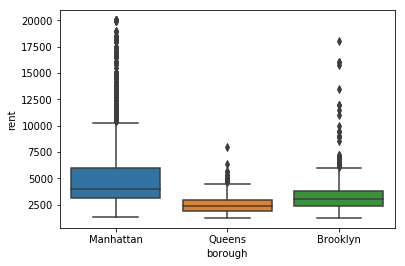

In [9]:
sns.boxplot(x='borough', y='rent', data = rentals)
plt.show()

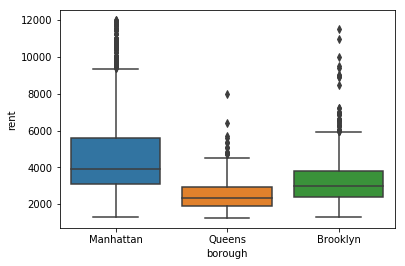

In [10]:
sns.boxplot(x='borough', y='rent', data = rentals[rentals.rent < 12000])
plt.show()

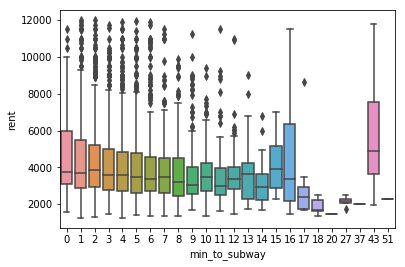

In [11]:
sns.boxplot(x='min_to_subway', y='rent', data = rentals[rentals.rent < 12000])
plt.show()

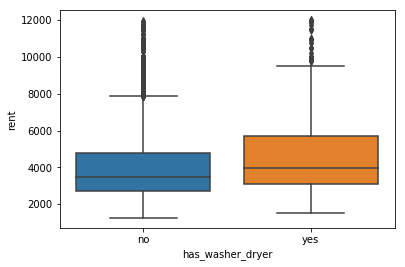

In [12]:
sns.boxplot(x='has_washer_dryer', y='rent', data = rentals[rentals.rent < 12000])
plt.show()

In [13]:
rentals.groupby('has_washer_dryer').median().rent

has_washer_dryer
no     3500
yes    4100
Name: rent, dtype: int64

In [14]:
rentals.groupby('has_patio').median().rent

has_patio
no     3595.0
yes    4258.0
Name: rent, dtype: float64

In [16]:
rentals.groupby('has_gym').median().rent

has_gym
no     3515
yes    4000
Name: rent, dtype: int64

In [18]:
rentals.groupby('has_doorman').median().rent

has_doorman
no     3500.0
yes    3950.0
Name: rent, dtype: float64

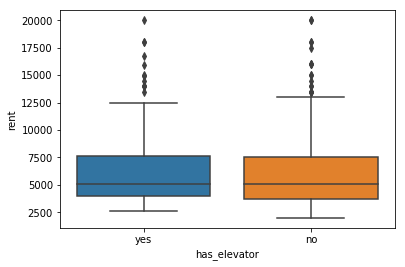

In [20]:
sns.boxplot(x='has_elevator', y='rent', data = rentals[rentals.floor > 30])
plt.show()

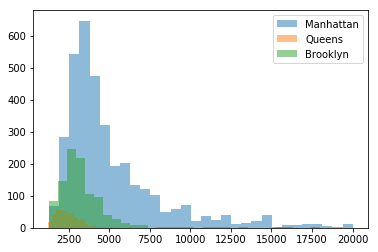

In [24]:
plt.hist(rentals.rent[rentals.borough=='Manhattan'], label='Manhattan', bins = 30, alpha=.5)
plt.hist(rentals.rent[rentals.borough=='Queens'], label='Queens', bins = 30, alpha=.5)
plt.hist(rentals.rent[rentals.borough=='Brooklyn'], label='Brooklyn', bins = 30, alpha=.5)
plt.legend()

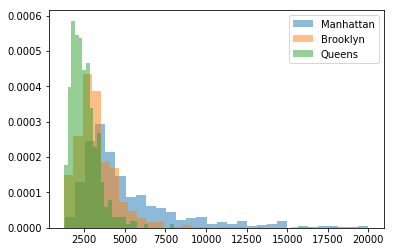

In [28]:
#Include 'density' so that each borough's histogram are on the same scale
plt.hist(rentals.rent[rentals.borough=='Manhattan'], label='Manhattan', bins = 30, density=True, alpha=.5)
plt.hist(rentals.rent[rentals.borough=='Brooklyn'], label='Brooklyn', bins = 30, density=True, alpha=.5)
plt.hist(rentals.rent[rentals.borough=='Queens'], label='Queens', bins = 30, density=True, alpha=.5)
plt.legend()

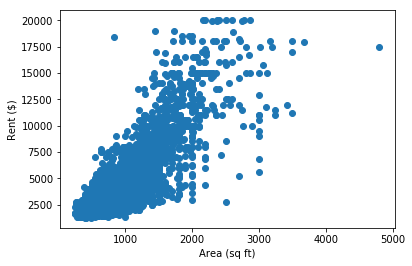

In [31]:
plt.scatter(rentals.size_sqft, rentals.rent)
plt.xlabel('Area (sq ft)')
plt.ylabel('Rent ($)')
plt.show()

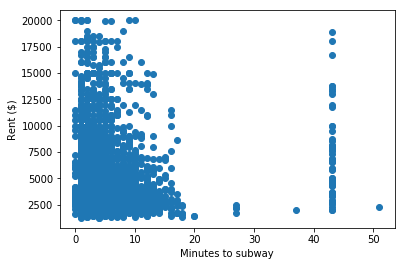

In [35]:
plt.scatter(rentals.min_to_subway, rentals.rent)
plt.xlabel('Minutes to subway')
plt.ylabel('Rent ($)')
plt.show()

In [37]:
from scipy.stats import pearsonr

In [39]:
#returns the Pearson correlation and the P-value
pearsonr(rentals.size_sqft, rentals.rent)

(0.8087835060658337, 0.0)

In [41]:
pearsonr(rentals.min_to_subway, rentals.rent)

(0.0036521780441398873, 0.7962646913056933)

In [44]:
rentals.corr()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
rent,1.000000,0.531200,0.733644,0.808784,0.003652,0.272351,-0.122302
bedrooms,0.531200,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329
bathrooms,0.733644,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050
size_sqft,0.808784,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434
min_to_subway,0.003652,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273
floor,0.272351,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757
building_age_yrs,-0.122302,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

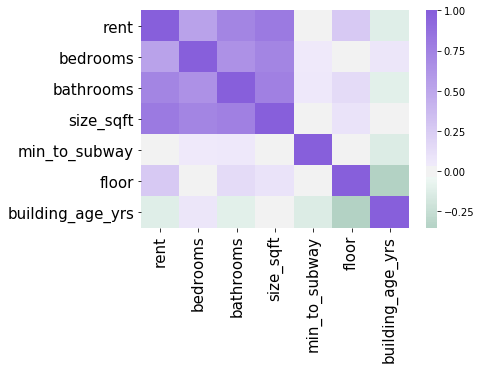

In [46]:
colors = sns.diverging_palette(150, 275, as_cmap=True)
#Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(rentals.corr(), center=0, cmap=colors)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

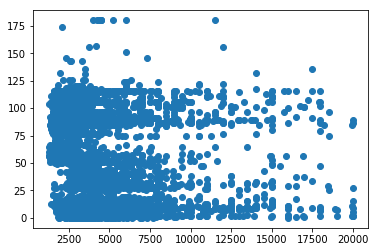

In [48]:
plt.scatter(rentals.rent, rentals.building_age_yrs)

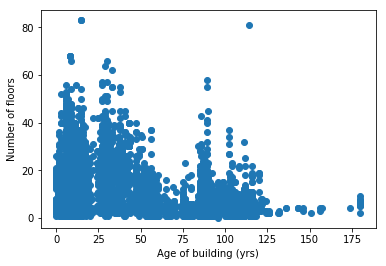

In [52]:
plt.scatter(rentals.building_age_yrs, rentals.floor)
plt.ylabel('Number of floors')
plt.xlabel('Age of building (yrs)')
plt.show()

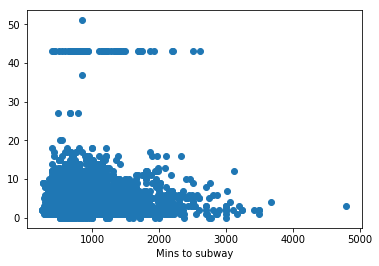

In [54]:
plt.scatter(rentals.size_sqft, rentals.min_to_subway)
plt.xlabel('Area (sq ft)')
plt.xlabel('Mins to subway')
plt.show()

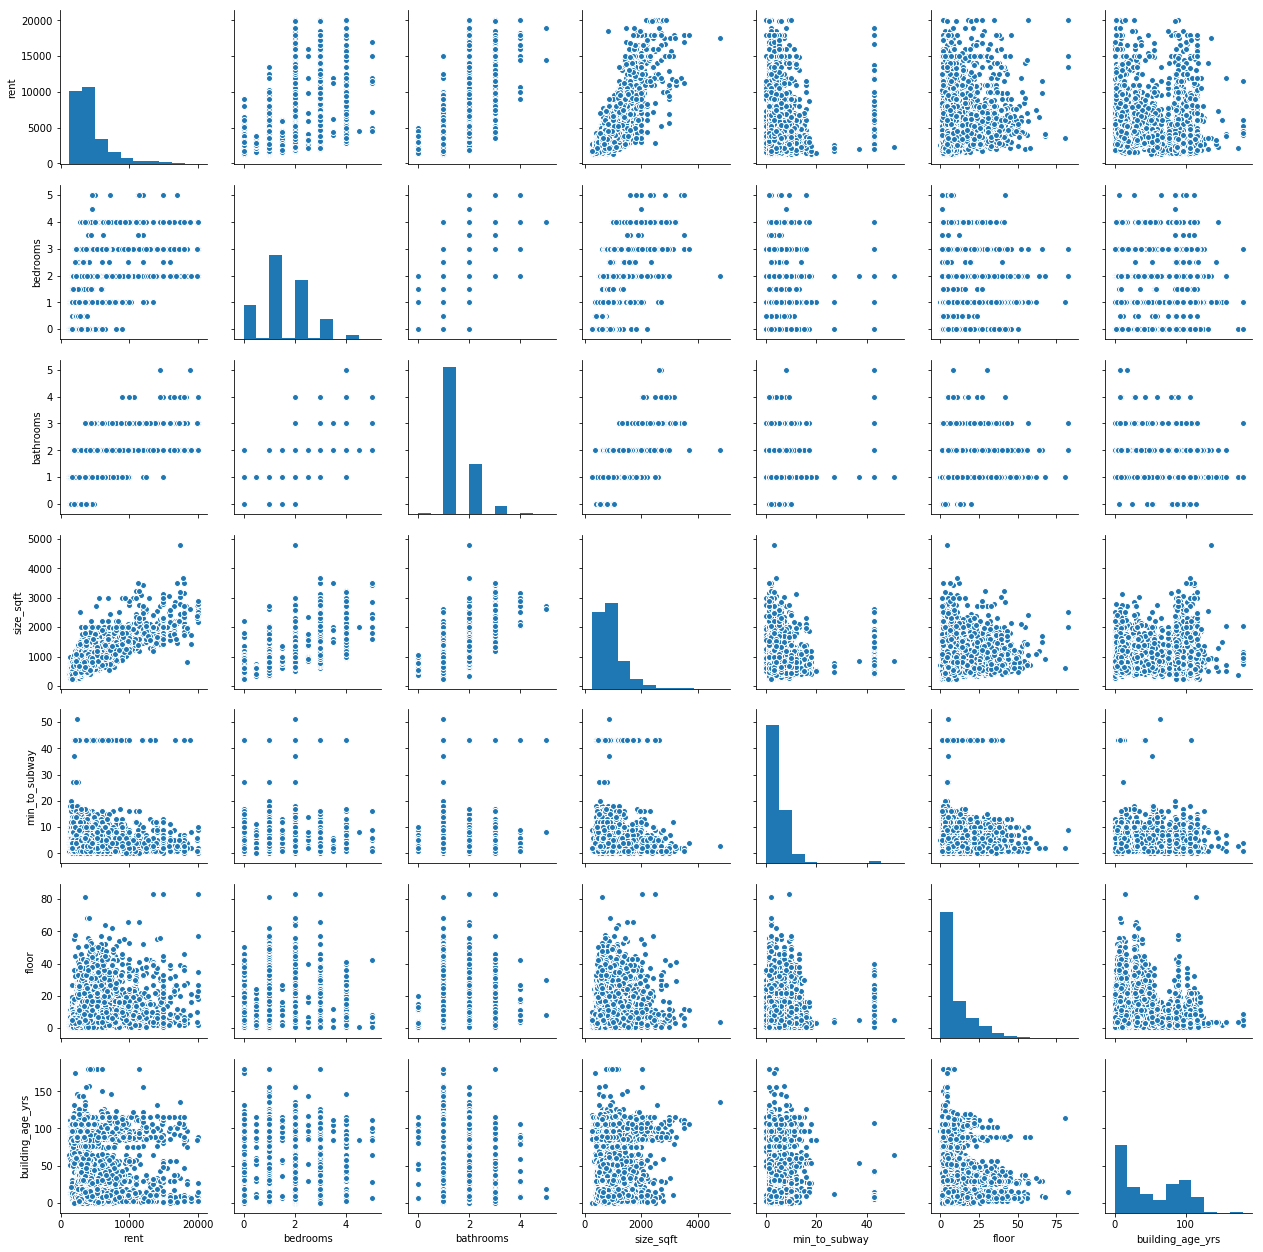

In [55]:
#Shows scatter plots of every variable against every other variable
sns.pairplot(rentals)
plt.show()

In [56]:
pd.crosstab(rentals.has_elevator, rentals.has_gym)

has_gym,no,yes
has_elevator,,
no,3748,52
yes,533,667


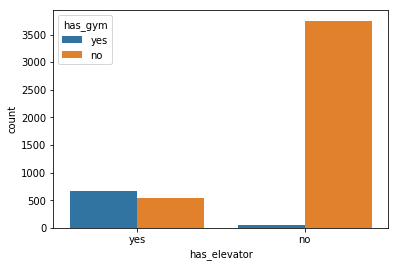

In [59]:
#Counts the apartments with elevators, and colours them differently based on whether they have a gym
sns.countplot(x='has_elevator', hue='has_gym', data=rentals)
plt.show()

In [60]:
from scipy.stats import chi2_contingency
Xtab = pd.crosstab(rentals.has_elevator, rentals.has_gym)
chi2_contingency(Xtab)

(2172.798470720333, 0.0, 1, array([[3253.56,  546.44],
        [1027.44,  172.56]]))